Connected to Python 3.10.12

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


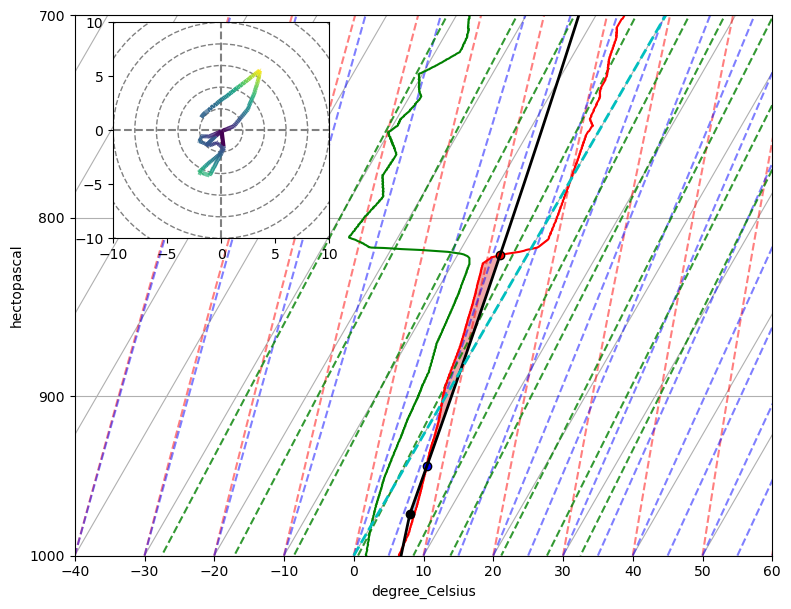

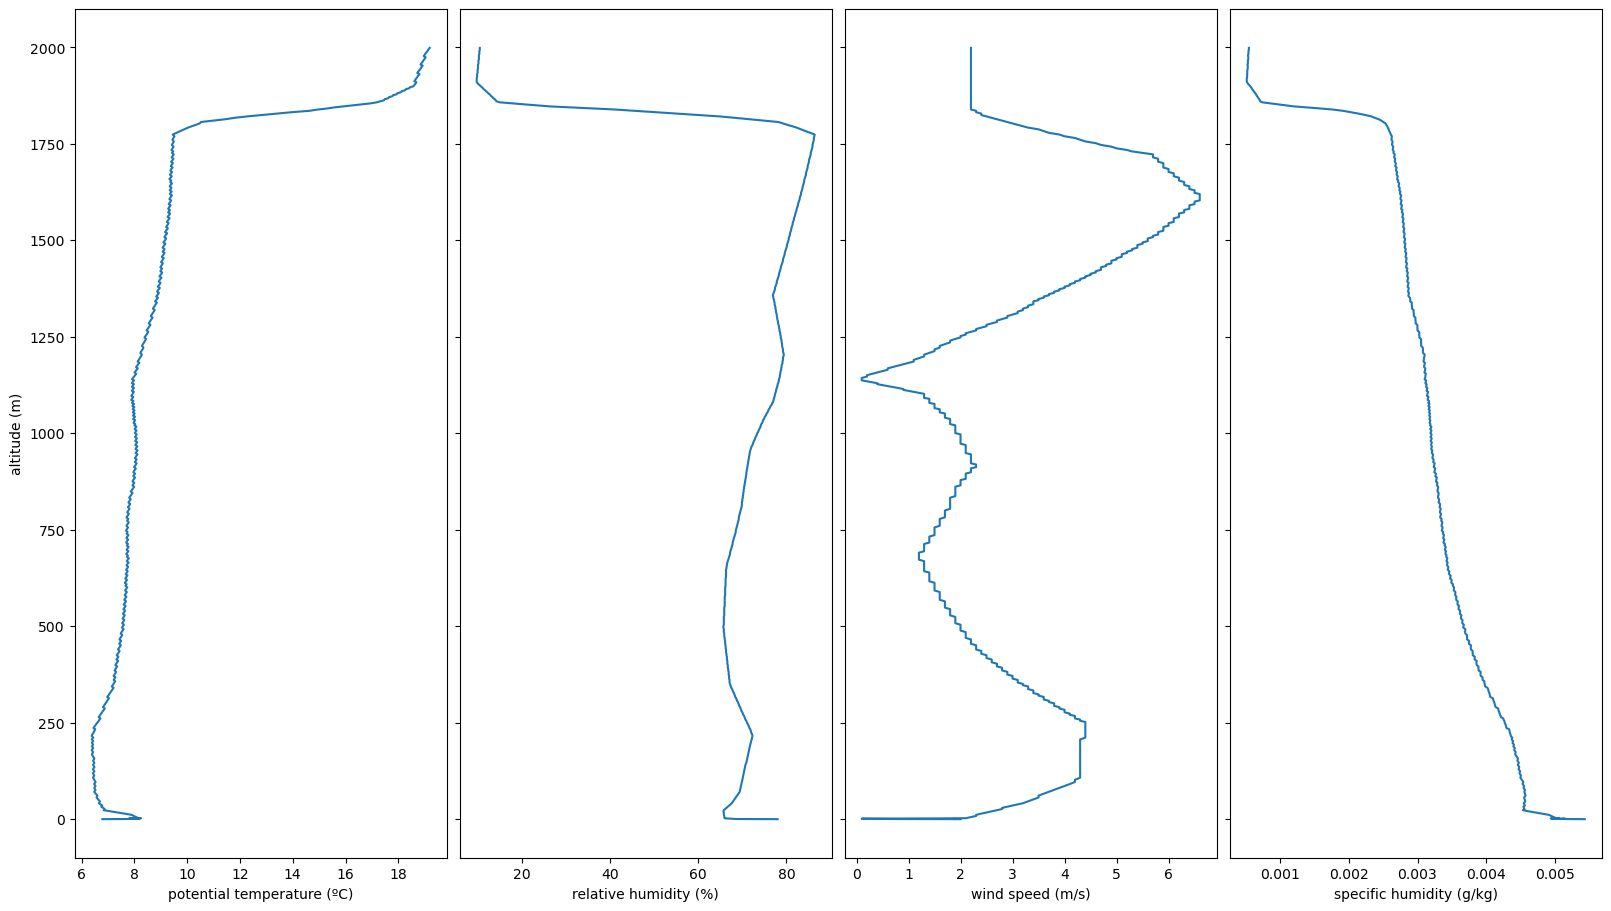

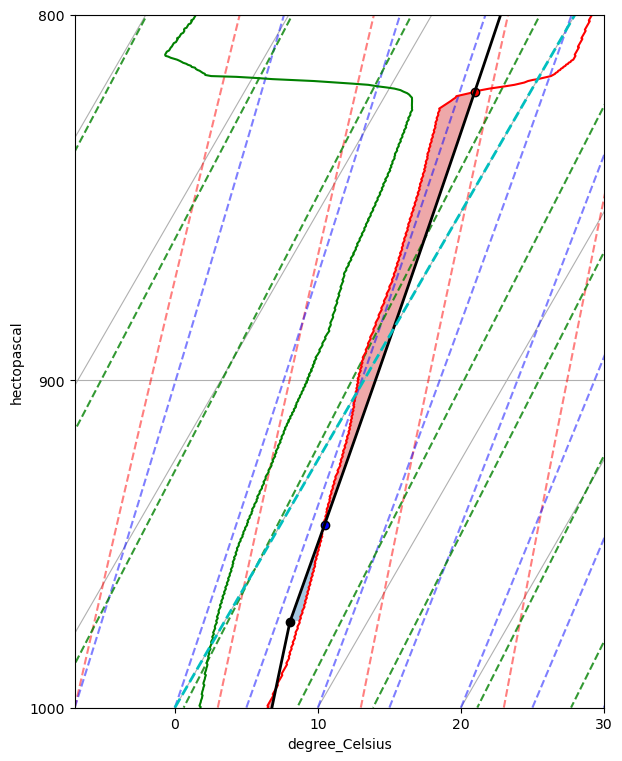

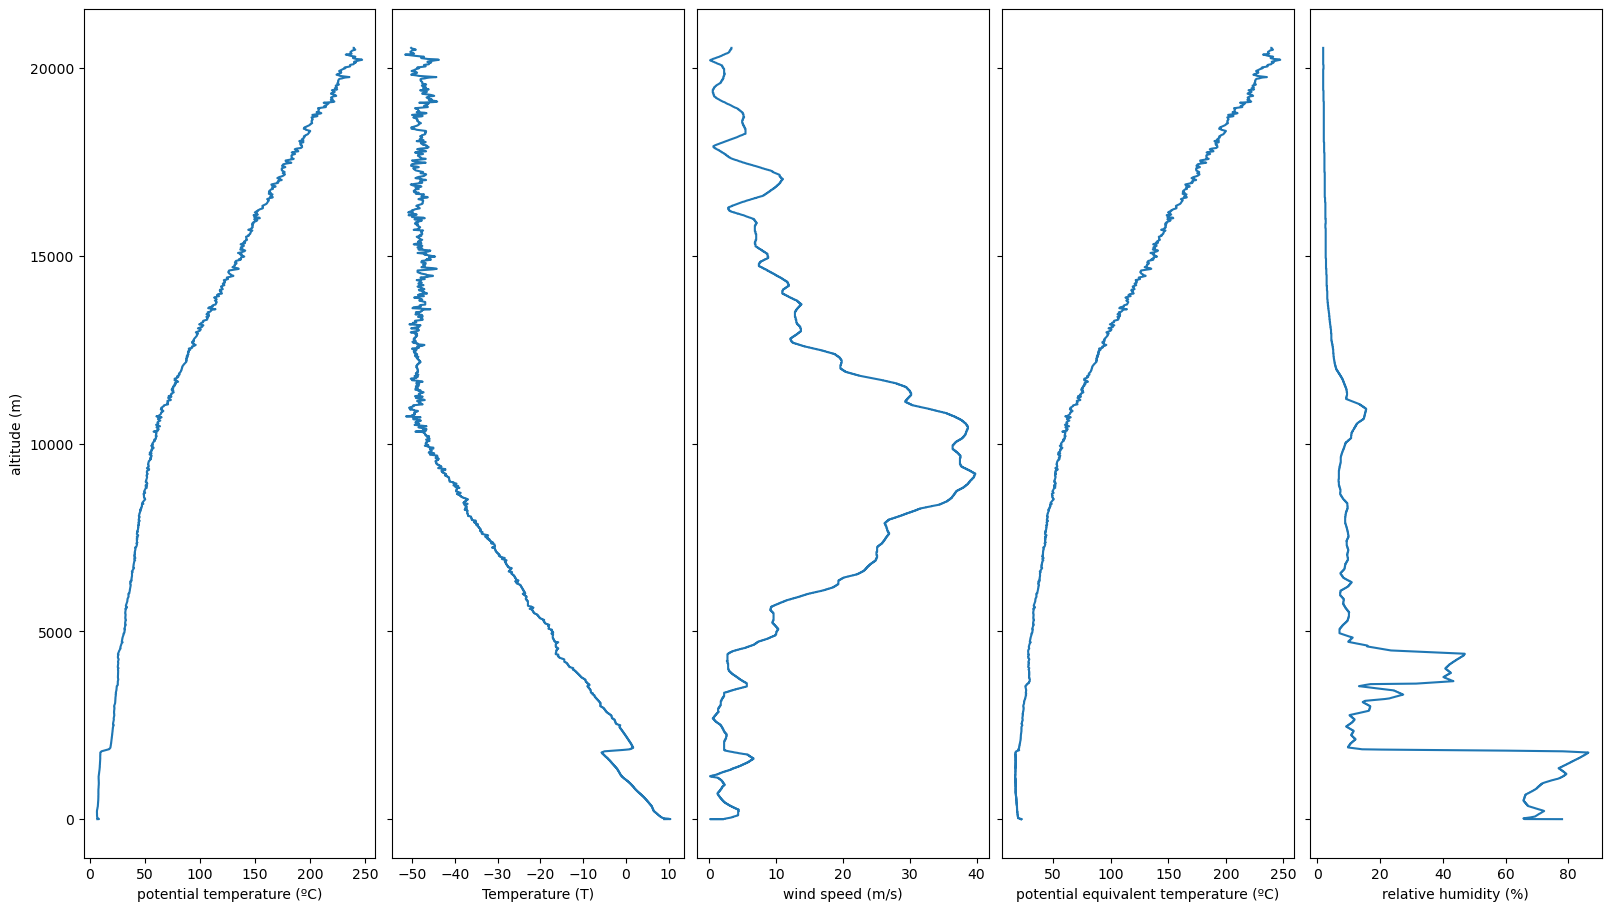

In [1]:
#-----------------------------------------------------------
#                       PACKAGES
#-----------------------------------------------------------
import pandas as pd
import metpy as met
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units
import metpy.calc as metcalc


#-----------------------------------------------------------
#                       FUNCTIONS
#-----------------------------------------------------------

def skew_fig(aspect,p0,p1,T0,T1,p,T,Td,extra=None,hodograph=None):

    """
    Plotting a Skew Figure by giving some parameters

    ----------
    Attributes
    ----------
    aspect : int
        size of the skew figure (find a aspect value by trial and error)
    p0: float
        initial value for the pressure (y0-axis value) 
    p1: float
        final value for the pressure (y1-axis value)
    T0: float
        initial value for the temperature (x0-axis value)
    T1: float
        final value for the temperature (x1-axis value)
    p: list
        list of pressure values 
    T: list
        list of temperature values     
    Td: list
        list of dew temperature values
    extra: bolean 
        if True, extra lines are generated in graph      
    hodograph: bolean 
        if True, hodograph graph is generated     
    """

    from metpy.plots import SkewT
    from metpy.plots import Hodograph, SkewT
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    # Create a new figure. The dimensions here give a good aspect ratio
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig, rotation=30, aspect=aspect)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    skew.plot(p, T, 'r')
    skew.plot(p, Td, 'g')
    skew.ax.set_ylim(p0, p1)
    skew.ax.set_xlim(T0, T1)

    # Calculate the LCL
    lcl_p, lcl_T = metcalc.lcl(p[0], T[0], Td[0])
    # Plot LCL temperature as black dot
    skew.plot(lcl_p, lcl_T, 'ko', markerfacecolor='black')

    # Calculate the LFC
    lfc_p, lfc_T = metcalc.lfc(p, T, Td)
    # Plot LFC temperature as blue dot
    skew.plot(lfc_p, lfc_T, 'ko', markerfacecolor='blue')

    # Calculate the EL
    leq_p, leq_T = metcalc.el(p, T, Td)
    # Plot LEQ temperature as red dot
    skew.plot(leq_p, leq_T, 'ko', markerfacecolor='red')

    if extra == True:

        # Calculate the parcel profile.
        parcel_prof = metcalc.parcel_profile(p, T[0], Td[0]).to('degC')
        # Plot the parcel profile as a black line
        skew.plot(p, parcel_prof, 'k', linewidth=2)

        # Shade areas of CAPE and CIN
        skew.shade_cin(p, T, parcel_prof, Td)
        skew.shade_cape(p, T, parcel_prof)

        # Plot a zero degree isotherm
        skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

        # Add the relevant special lines
        skew.plot_dry_adiabats()
        skew.plot_moist_adiabats()
        skew.plot_mixing_lines()

    if hodograph == True:

        # Create a hodograph
        # Create an inset axes object that is 40% width and height of the
        # figure and put it in the upper right hand corner.
        ax_hod = inset_axes(skew.ax, '40%', '40%', loc=2)
        p_2km, u_2km, v_2km, ws_2km = metcalc.get_layer(p,u,v,ws,height=z,depth=2*units.km)
        h = Hodograph(ax_hod, component_range=10.)
        h.add_grid(increment=2)
        h.plot_colormapped(u_2km, v_2km,ws_2km)  # Plot a line colored by wind speed

    return plt.show()

def unstable_profiles_fig(z,theta,Ur,U,ws,layer_z=None):
    
    """
    Plotting for figures for analyse stability profiles

    ----------
    Attributes
    ----------
    z: list
        list of altitude 
    theta: list
        list of potential temperature
    Ur: list
        list of relative humidity
    U: list
        list of specific humidity
    ws: list
        list of velocities
    layer_z: float
        value for the maximum height
    """

    from metpy.units import units

    if layer_z != None:
        #Define a layer with altitude less than layer_z meters
        layer = z < layer_z * units.meters
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,9), layout='constrained', sharey=True)
    
        ax1.plot(theta[layer], z[layer])
        #ax1.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 90, color = 'r', linestyle = '-') 
        ax1.set_ylabel('altitude (m)')
        ax1.set_xlabel('potential temperature (ºC)')

        ax2.plot(Ur[layer], z[layer])
        #ax2.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 90, color = 'r', linestyle = '-') 
        ax2.set_xlabel('relative humidity (%)')

        ax3.plot(ws[layer], z[layer])
        #ax3.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 90, color = 'r', linestyle = '-') 
        ax3.set_xlabel('wind speed (m/s)')

        ax4.plot(U[layer], z[layer])
        #ax4.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 90, color = 'r', linestyle = '-') 
        ax4.set_xlabel('specific humidity (g/kg)')
    else:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,9), layout='constrained', sharey=True)
    
        ax1.plot(theta, z)
        #ax1.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 90, color = 'r', linestyle = '-') 
        ax1.set_ylabel('altitude (m)')
        ax1.set_xlabel('potential temperature (ºC)')

        ax2.plot(Ur, z)
        #ax2.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 90, color = 'r', linestyle = '-') 
        ax2.set_xlabel('relative humidity (%)')

        ax3.plot(ws, z)
        #ax3.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 90, color = 'r', linestyle = '-') 
        ax3.set_xlabel('wind speed (m/s)')

        ax4.plot(U, z)
        #ax4.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 90, color = 'r', linestyle = '-') 
        ax4.set_xlabel('specific humidity (g/kg)')        
    return plt.show()

#-----------------------------------------------------------
#                    DATA ADQUISITION
#-----------------------------------------------------------
df = pd.read_csv('./data20210920.txt', sep='\s+') #\s+ for one or more spaces between columns

p = df['P[hPa]'].tolist() * units.hPa   #Pressure in hPa
T = df['T[C]'].tolist() * units.degC    #Temperatura in celsius
Ur = df['U[%]'].tolist() * units.percent    #Relative humidity
ws = df['Wsp[m/s]'].tolist() * units.meters/units.seconds   #Wind Velocity in m/s
wd = df['Wdir[Grd]'].tolist() * units.degrees   #Wind direction in degrees
z = df['Altitude[m]'].tolist() * units.meters   #Altitude in meters

Td = metcalc.dewpoint_from_relative_humidity(T, Ur) #Dew point temperature
theta = metcalc.potential_temperature(p,T)  #Potential temperature
theta = theta.to("degC")    #Conversion of potential temperature to celsius 
theta_e = metcalc.equivalent_potential_temperature(p,T,Td)  #Potential equivalent temp
theta_e = theta_e.to("degC")    #Conversion of potential temperature to degrees
u, v = metcalc.wind_components(ws, wd)  #Velocity vector compounds
U = metcalc.specific_humidity_from_dewpoint(p,Td)   #Specific humidity
#-----------------------------------------------------------

skew_fig(500,1000,700,-40,60,p,T,Td,True,True)
unstable_profiles_fig(z,theta,Ur,U,ws,layer_z=2000)
skew_fig(500,1000,800,-7,30,p,T,Td,True)



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16,9),layout='constrained', sharey=True)
ax1.plot(theta, z)
ax1.set_xlabel('potential temperature (ºC)')
ax1.set_ylabel('altitude (m)')

ax2.plot(T, z)
ax2.set_xlabel('Temperature (T)')

ax3.plot(ws, z)
ax3.set_xlabel('wind speed (m/s)')

ax4.plot(theta_e, z)
ax4.set_xlabel('potential equivalent temperature (ºC)')

ax5.plot(Ur, z)
ax5.set_xlabel('relative humidity (%)')


plt.show()

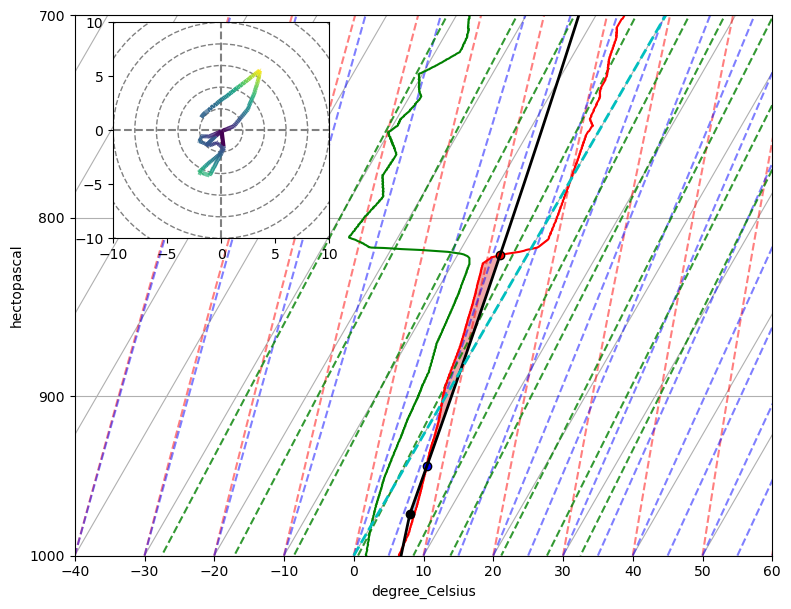

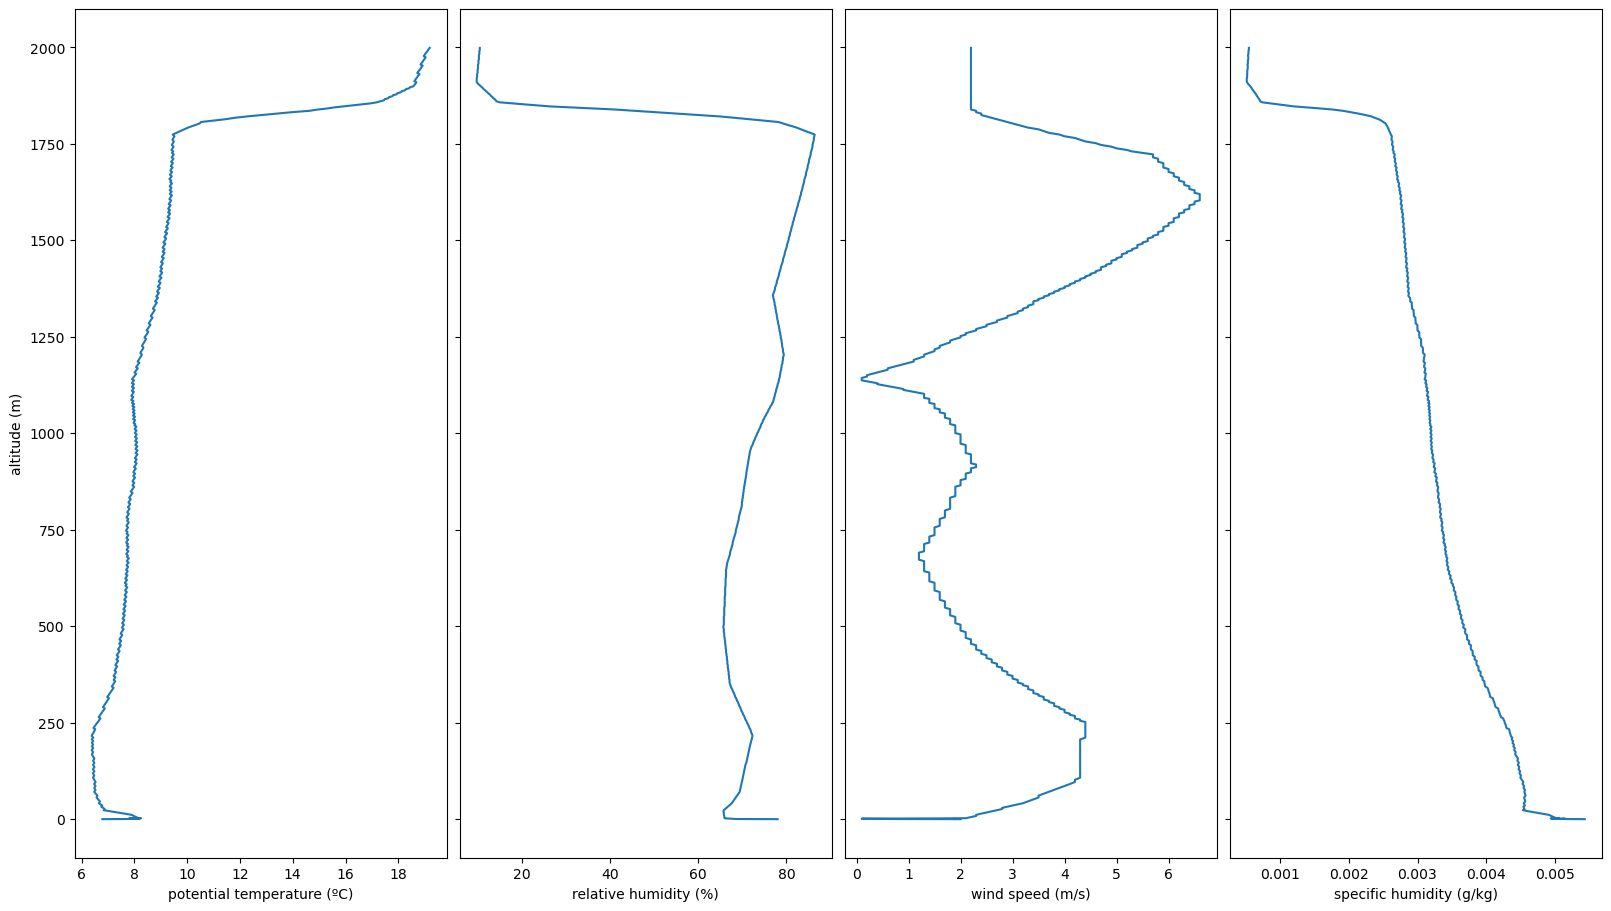

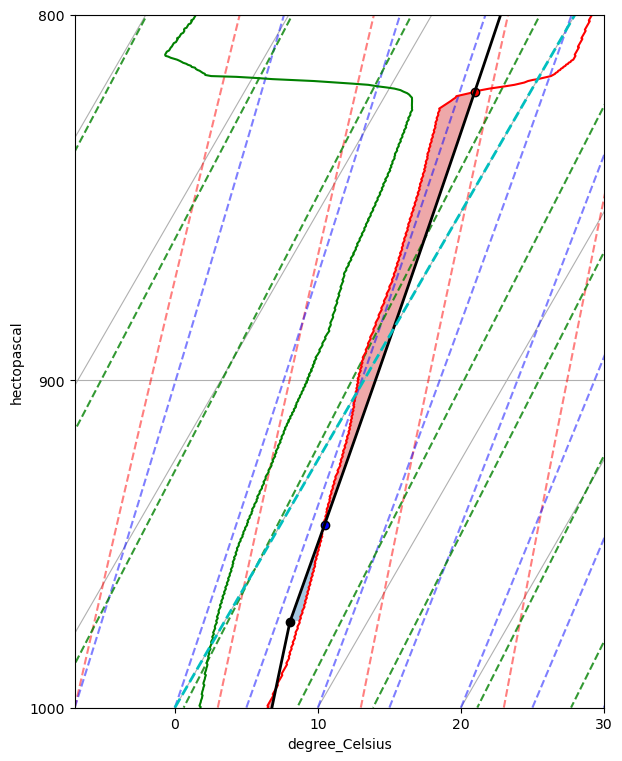

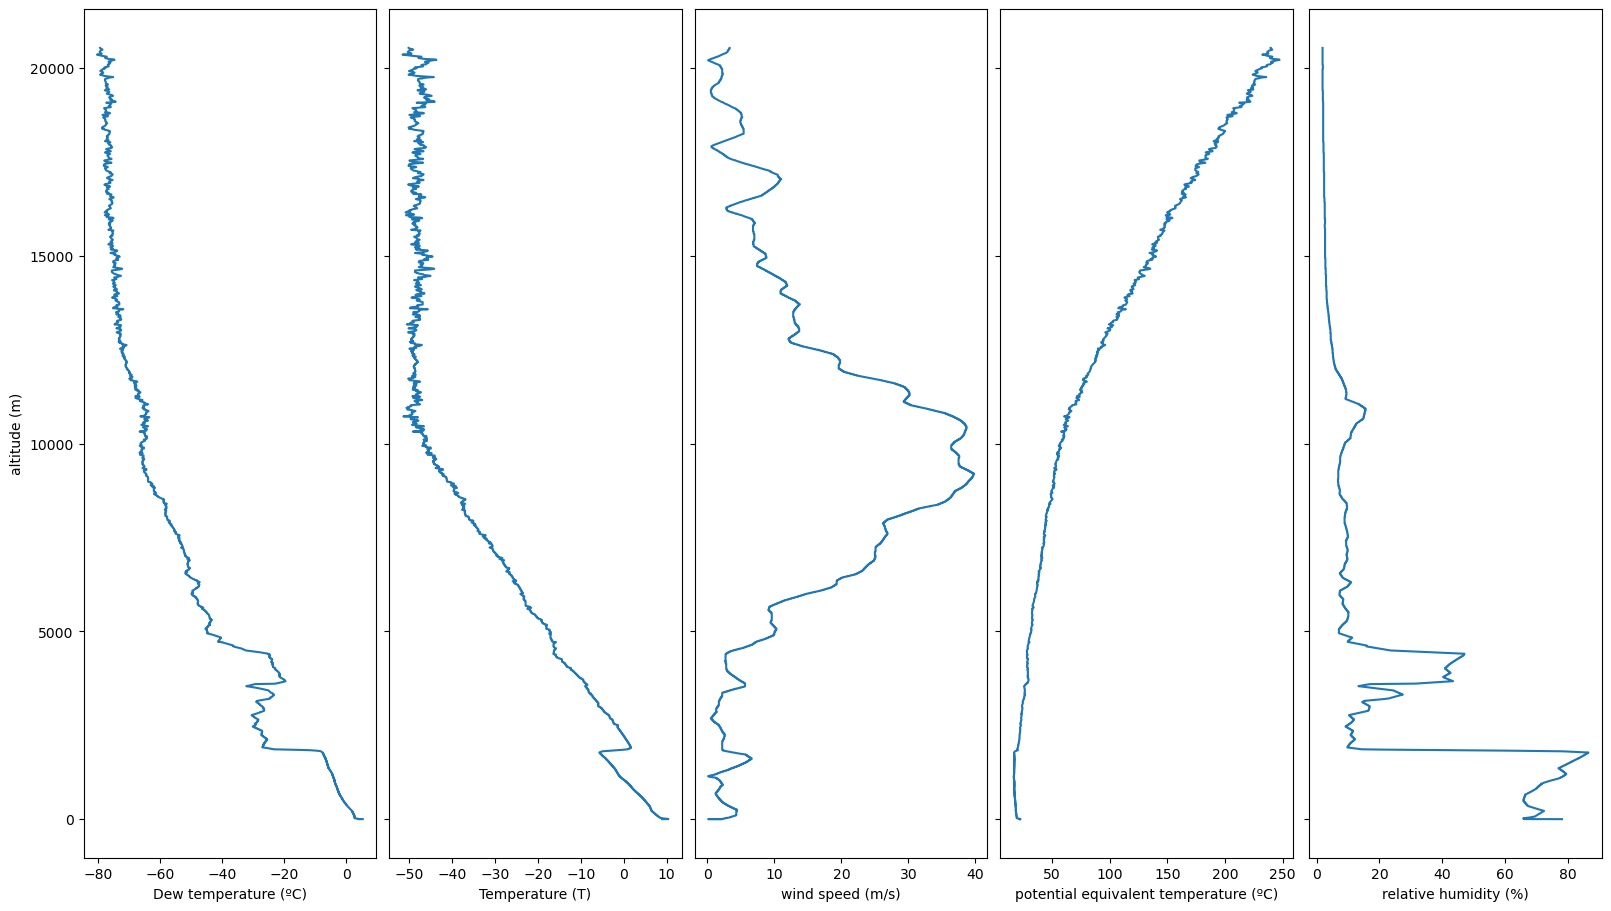

In [2]:
#-----------------------------------------------------------
#                       PACKAGES
#-----------------------------------------------------------
import pandas as pd
import metpy as met
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units
import metpy.calc as metcalc


#-----------------------------------------------------------
#                       FUNCTIONS
#-----------------------------------------------------------

def skew_fig(aspect,p0,p1,T0,T1,p,T,Td,extra=None,hodograph=None):

    """
    Plotting a Skew Figure by giving some parameters

    ----------
    Attributes
    ----------
    aspect : int
        size of the skew figure (find a aspect value by trial and error)
    p0: float
        initial value for the pressure (y0-axis value) 
    p1: float
        final value for the pressure (y1-axis value)
    T0: float
        initial value for the temperature (x0-axis value)
    T1: float
        final value for the temperature (x1-axis value)
    p: list
        list of pressure values 
    T: list
        list of temperature values     
    Td: list
        list of dew temperature values
    extra: bolean 
        if True, extra lines are generated in graph      
    hodograph: bolean 
        if True, hodograph graph is generated     
    """

    from metpy.plots import SkewT
    from metpy.plots import Hodograph, SkewT
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    # Create a new figure. The dimensions here give a good aspect ratio
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig, rotation=30, aspect=aspect)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    skew.plot(p, T, 'r')
    skew.plot(p, Td, 'g')
    skew.ax.set_ylim(p0, p1)
    skew.ax.set_xlim(T0, T1)

    # Calculate the LCL
    lcl_p, lcl_T = metcalc.lcl(p[0], T[0], Td[0])
    # Plot LCL temperature as black dot
    skew.plot(lcl_p, lcl_T, 'ko', markerfacecolor='black')

    # Calculate the LFC
    lfc_p, lfc_T = metcalc.lfc(p, T, Td)
    # Plot LFC temperature as blue dot
    skew.plot(lfc_p, lfc_T, 'ko', markerfacecolor='blue')

    # Calculate the EL
    leq_p, leq_T = metcalc.el(p, T, Td)
    # Plot LEQ temperature as red dot
    skew.plot(leq_p, leq_T, 'ko', markerfacecolor='red')

    if extra == True:

        # Calculate the parcel profile.
        parcel_prof = metcalc.parcel_profile(p, T[0], Td[0]).to('degC')
        # Plot the parcel profile as a black line
        skew.plot(p, parcel_prof, 'k', linewidth=2)

        # Shade areas of CAPE and CIN
        skew.shade_cin(p, T, parcel_prof, Td)
        skew.shade_cape(p, T, parcel_prof)

        # Plot a zero degree isotherm
        skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

        # Add the relevant special lines
        skew.plot_dry_adiabats()
        skew.plot_moist_adiabats()
        skew.plot_mixing_lines()

    if hodograph == True:

        # Create a hodograph
        # Create an inset axes object that is 40% width and height of the
        # figure and put it in the upper right hand corner.
        ax_hod = inset_axes(skew.ax, '40%', '40%', loc=2)
        p_2km, u_2km, v_2km, ws_2km = metcalc.get_layer(p,u,v,ws,height=z,depth=2*units.km)
        h = Hodograph(ax_hod, component_range=10.)
        h.add_grid(increment=2)
        h.plot_colormapped(u_2km, v_2km,ws_2km)  # Plot a line colored by wind speed

    return plt.show()

def unstable_profiles_fig(z,theta,Ur,U,ws,layer_z=None):
    
    """
    Plotting for figures for analyse stability profiles

    ----------
    Attributes
    ----------
    z: list
        list of altitude 
    theta: list
        list of potential temperature
    Ur: list
        list of relative humidity
    U: list
        list of specific humidity
    ws: list
        list of velocities
    layer_z: float
        value for the maximum height
    """

    from metpy.units import units

    if layer_z != None:
        #Define a layer with altitude less than layer_z meters
        layer = z < layer_z * units.meters
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,9), layout='constrained', sharey=True)
    
        ax1.plot(theta[layer], z[layer])
        #ax1.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 90, color = 'r', linestyle = '-') 
        ax1.set_ylabel('altitude (m)')
        ax1.set_xlabel('potential temperature (ºC)')

        ax2.plot(Ur[layer], z[layer])
        #ax2.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 90, color = 'r', linestyle = '-') 
        ax2.set_xlabel('relative humidity (%)')

        ax3.plot(ws[layer], z[layer])
        #ax3.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 90, color = 'r', linestyle = '-') 
        ax3.set_xlabel('wind speed (m/s)')

        ax4.plot(U[layer], z[layer])
        #ax4.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 90, color = 'r', linestyle = '-') 
        ax4.set_xlabel('specific humidity (g/kg)')
    else:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,9), layout='constrained', sharey=True)
    
        ax1.plot(theta, z)
        #ax1.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 90, color = 'r', linestyle = '-') 
        ax1.set_ylabel('altitude (m)')
        ax1.set_xlabel('potential temperature (ºC)')

        ax2.plot(Ur, z)
        #ax2.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 90, color = 'r', linestyle = '-') 
        ax2.set_xlabel('relative humidity (%)')

        ax3.plot(ws, z)
        #ax3.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 90, color = 'r', linestyle = '-') 
        ax3.set_xlabel('wind speed (m/s)')

        ax4.plot(U, z)
        #ax4.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 90, color = 'r', linestyle = '-') 
        ax4.set_xlabel('specific humidity (g/kg)')        
    return plt.show()

#-----------------------------------------------------------
#                    DATA ADQUISITION
#-----------------------------------------------------------
df = pd.read_csv('./data20210920.txt', sep='\s+') #\s+ for one or more spaces between columns

p = df['P[hPa]'].tolist() * units.hPa   #Pressure in hPa
T = df['T[C]'].tolist() * units.degC    #Temperatura in celsius
Ur = df['U[%]'].tolist() * units.percent    #Relative humidity
ws = df['Wsp[m/s]'].tolist() * units.meters/units.seconds   #Wind Velocity in m/s
wd = df['Wdir[Grd]'].tolist() * units.degrees   #Wind direction in degrees
z = df['Altitude[m]'].tolist() * units.meters   #Altitude in meters

Td = metcalc.dewpoint_from_relative_humidity(T, Ur) #Dew point temperature
theta = metcalc.potential_temperature(p,T)  #Potential temperature
theta = theta.to("degC")    #Conversion of potential temperature to celsius 
theta_e = metcalc.equivalent_potential_temperature(p,T,Td)  #Potential equivalent temp
theta_e = theta_e.to("degC")    #Conversion of potential temperature to degrees
u, v = metcalc.wind_components(ws, wd)  #Velocity vector compounds
U = metcalc.specific_humidity_from_dewpoint(p,Td)   #Specific humidity
#-----------------------------------------------------------

skew_fig(500,1000,700,-40,60,p,T,Td,True,True)
unstable_profiles_fig(z,theta,Ur,U,ws,layer_z=2000)
skew_fig(500,1000,800,-7,30,p,T,Td,True)



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16,9),layout='constrained', sharey=True)
ax1.plot(Td, z)
ax1.set_xlabel('Dew temperature (ºC)')
ax1.set_ylabel('altitude (m)')

ax2.plot(T, z)
ax2.set_xlabel('Temperature (T)')

ax3.plot(ws, z)
ax3.set_xlabel('wind speed (m/s)')

ax4.plot(theta_e, z)
ax4.set_xlabel('potential equivalent temperature (ºC)')

ax5.plot(Ur, z)
ax5.set_xlabel('relative humidity (%)')


plt.show()

Connected to Python 3.10.12

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


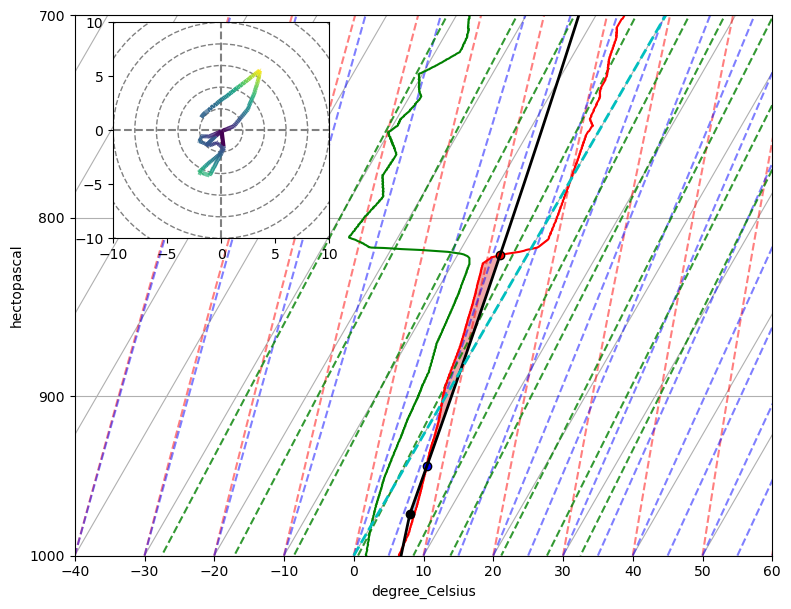

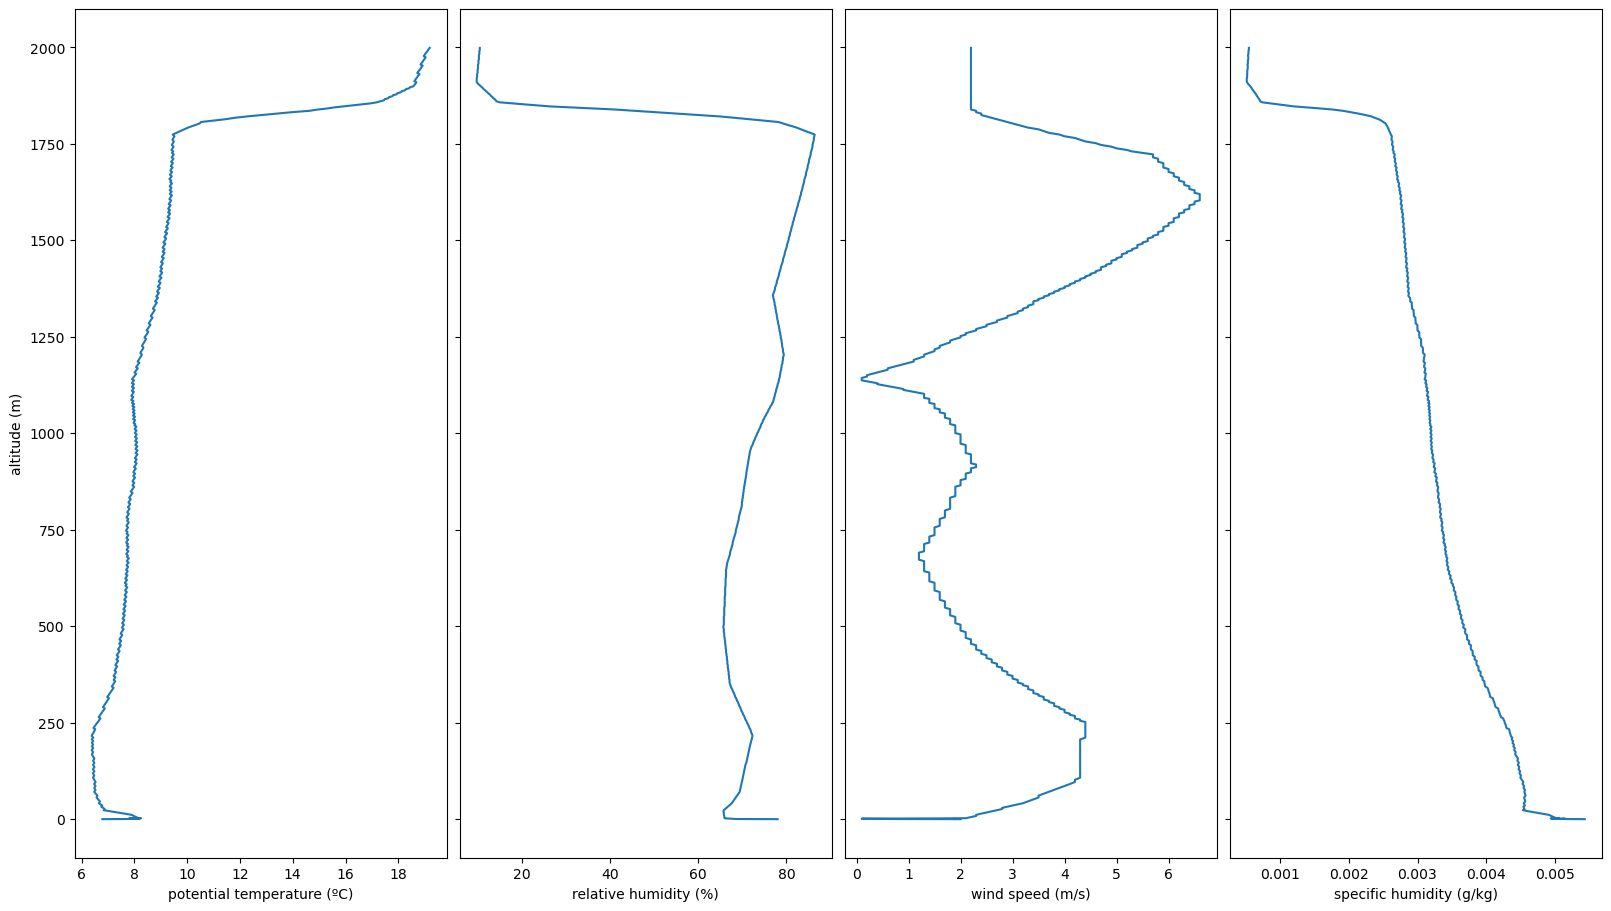

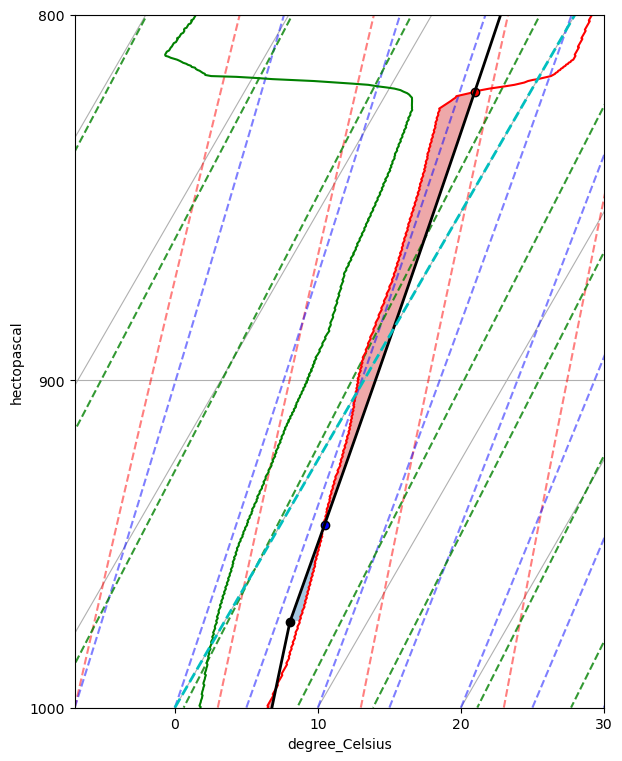

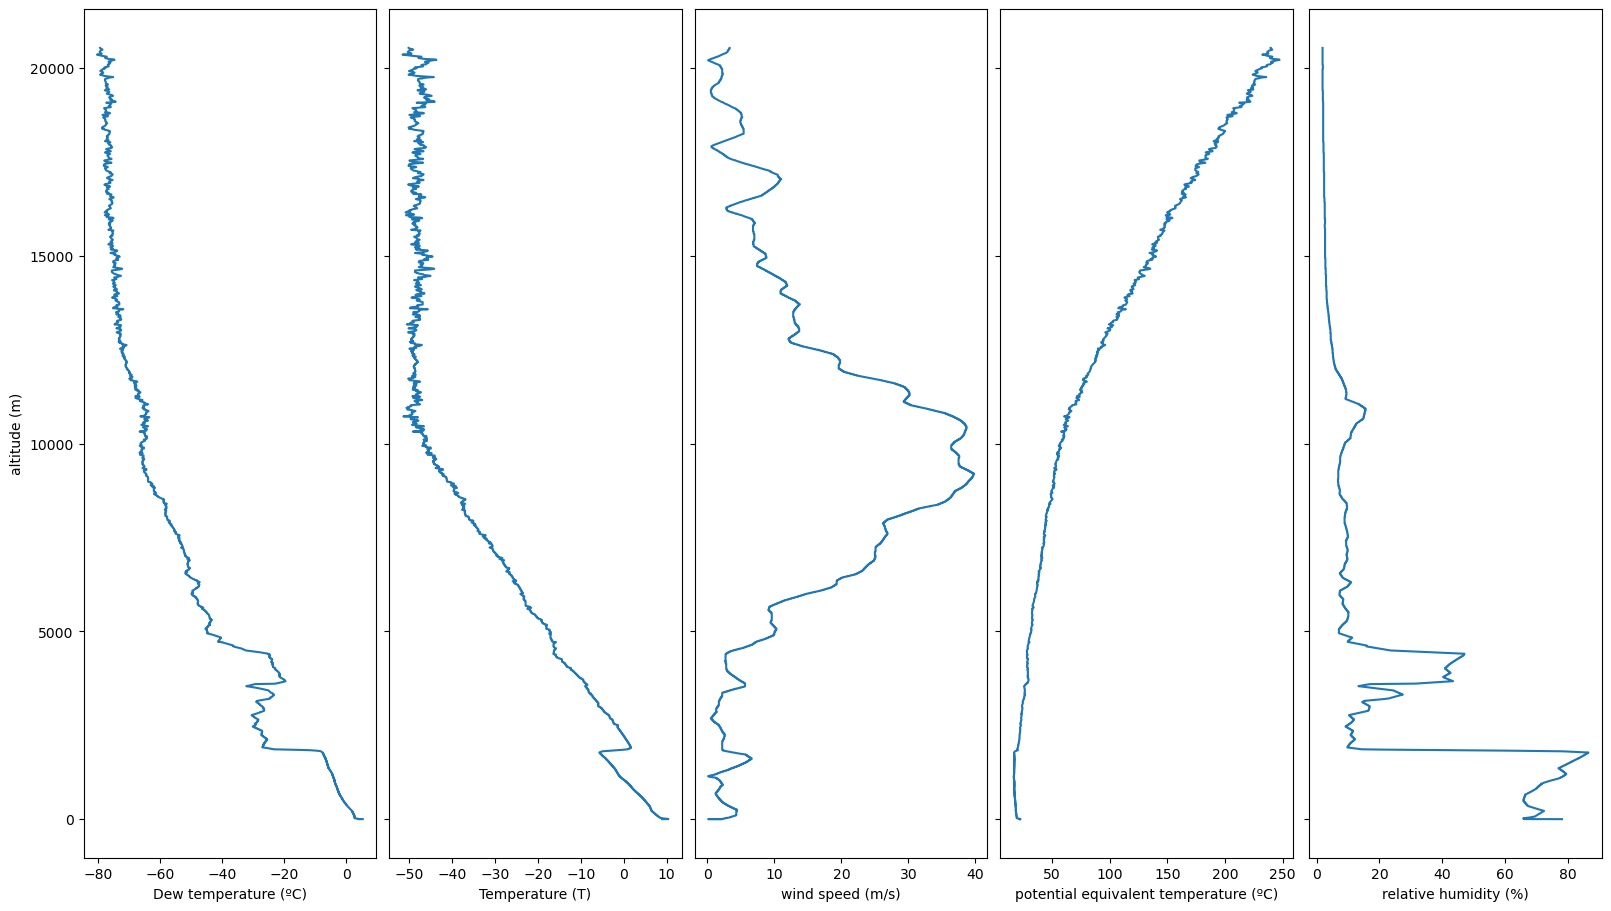

In [1]:
#-----------------------------------------------------------
#                       PACKAGES
#-----------------------------------------------------------
import pandas as pd
import metpy as met
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units
import metpy.calc as metcalc


#-----------------------------------------------------------
#                       FUNCTIONS
#-----------------------------------------------------------

def skew_fig(aspect,p0,p1,T0,T1,p,T,Td,extra=None,hodograph=None):

    """
    Plotting a Skew Figure by giving some parameters

    ----------
    Attributes
    ----------
    aspect : int
        size of the skew figure (find a aspect value by trial and error)
    p0: float
        initial value for the pressure (y0-axis value) 
    p1: float
        final value for the pressure (y1-axis value)
    T0: float
        initial value for the temperature (x0-axis value)
    T1: float
        final value for the temperature (x1-axis value)
    p: list
        list of pressure values 
    T: list
        list of temperature values     
    Td: list
        list of dew temperature values
    extra: bolean 
        if True, extra lines are generated in graph      
    hodograph: bolean 
        if True, hodograph graph is generated     
    """

    from metpy.plots import SkewT
    from metpy.plots import Hodograph, SkewT
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    # Create a new figure. The dimensions here give a good aspect ratio
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig, rotation=30, aspect=aspect)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    skew.plot(p, T, 'r')
    skew.plot(p, Td, 'g')
    skew.ax.set_ylim(p0, p1)
    skew.ax.set_xlim(T0, T1)

    # Calculate the LCL
    lcl_p, lcl_T = metcalc.lcl(p[0], T[0], Td[0])
    # Plot LCL temperature as black dot
    skew.plot(lcl_p, lcl_T, 'ko', markerfacecolor='black')

    # Calculate the LFC
    lfc_p, lfc_T = metcalc.lfc(p, T, Td)
    # Plot LFC temperature as blue dot
    skew.plot(lfc_p, lfc_T, 'ko', markerfacecolor='blue')

    # Calculate the EL
    leq_p, leq_T = metcalc.el(p, T, Td)
    # Plot LEQ temperature as red dot
    skew.plot(leq_p, leq_T, 'ko', markerfacecolor='red')

    if extra == True:

        # Calculate the parcel profile.
        parcel_prof = metcalc.parcel_profile(p, T[0], Td[0]).to('degC')
        # Plot the parcel profile as a black line
        skew.plot(p, parcel_prof, 'k', linewidth=2)

        # Shade areas of CAPE and CIN
        skew.shade_cin(p, T, parcel_prof, Td)
        skew.shade_cape(p, T, parcel_prof)

        # Plot a zero degree isotherm
        skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

        # Add the relevant special lines
        skew.plot_dry_adiabats()
        skew.plot_moist_adiabats()
        skew.plot_mixing_lines()

    if hodograph == True:

        # Create a hodograph
        # Create an inset axes object that is 40% width and height of the
        # figure and put it in the upper right hand corner.
        ax_hod = inset_axes(skew.ax, '40%', '40%', loc=2)
        p_2km, u_2km, v_2km, ws_2km = metcalc.get_layer(p,u,v,ws,height=z,depth=2*units.km)
        h = Hodograph(ax_hod, component_range=10.)
        h.add_grid(increment=2)
        h.plot_colormapped(u_2km, v_2km,ws_2km)  # Plot a line colored by wind speed

    return plt.show()

def unstable_profiles_fig(z,theta,Ur,U,ws,layer_z=None):
    
    """
    Plotting for figures for analyse stability profiles

    ----------
    Attributes
    ----------
    z: list
        list of altitude 
    theta: list
        list of potential temperature
    Ur: list
        list of relative humidity
    U: list
        list of specific humidity
    ws: list
        list of velocities
    layer_z: float
        value for the maximum height
    """

    from metpy.units import units

    if layer_z != None:
        #Define a layer with altitude less than layer_z meters
        layer = z < layer_z * units.meters
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,9), layout='constrained', sharey=True)
    
        ax1.plot(theta[layer], z[layer])
        #ax1.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 90, color = 'r', linestyle = '-') 
        ax1.set_ylabel('altitude (m)')
        ax1.set_xlabel('potential temperature (ºC)')

        ax2.plot(Ur[layer], z[layer])
        #ax2.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 90, color = 'r', linestyle = '-') 
        ax2.set_xlabel('relative humidity (%)')

        ax3.plot(ws[layer], z[layer])
        #ax3.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 90, color = 'r', linestyle = '-') 
        ax3.set_xlabel('wind speed (m/s)')

        ax4.plot(U[layer], z[layer])
        #ax4.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 90, color = 'r', linestyle = '-') 
        ax4.set_xlabel('specific humidity (g/kg)')
    else:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,9), layout='constrained', sharey=True)
    
        ax1.plot(theta, z)
        #ax1.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax1.axhline(y = 90, color = 'r', linestyle = '-') 
        ax1.set_ylabel('altitude (m)')
        ax1.set_xlabel('potential temperature (ºC)')

        ax2.plot(Ur, z)
        #ax2.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax2.axhline(y = 90, color = 'r', linestyle = '-') 
        ax2.set_xlabel('relative humidity (%)')

        ax3.plot(ws, z)
        #ax3.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax3.axhline(y = 90, color = 'r', linestyle = '-') 
        ax3.set_xlabel('wind speed (m/s)')

        ax4.plot(U, z)
        #ax4.axhline(y = 1900, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 1800, color = 'g', linestyle = '-') 
        #ax4.axhline(y = 90, color = 'r', linestyle = '-') 
        ax4.set_xlabel('specific humidity (g/kg)')        
    return plt.show()

#-----------------------------------------------------------
#                    DATA ADQUISITION
#-----------------------------------------------------------
df = pd.read_csv('./data20210920.txt', sep='\s+') #\s+ for one or more spaces between columns

p = df['P[hPa]'].tolist() * units.hPa   #Pressure in hPa
T = df['T[C]'].tolist() * units.degC    #Temperatura in celsius
Ur = df['U[%]'].tolist() * units.percent    #Relative humidity
ws = df['Wsp[m/s]'].tolist() * units.meters/units.seconds   #Wind Velocity in m/s
wd = df['Wdir[Grd]'].tolist() * units.degrees   #Wind direction in degrees
z = df['Altitude[m]'].tolist() * units.meters   #Altitude in meters

Td = metcalc.dewpoint_from_relative_humidity(T, Ur) #Dew point temperature
theta = metcalc.potential_temperature(p,T)  #Potential temperature
theta = theta.to("degC")    #Conversion of potential temperature to celsius 
theta_e = metcalc.equivalent_potential_temperature(p,T,Td)  #Potential equivalent temp
theta_e = theta_e.to("degC")    #Conversion of potential temperature to degrees
u, v = metcalc.wind_components(ws, wd)  #Velocity vector compounds
U = metcalc.specific_humidity_from_dewpoint(p,Td)   #Specific humidity
#-----------------------------------------------------------

skew_fig(500,1000,700,-40,60,p,T,Td,True,True)
unstable_profiles_fig(z,theta,Ur,U,ws,layer_z=2000)
skew_fig(500,1000,800,-7,30,p,T,Td,True)



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16,9),layout='constrained', sharey=True)
ax1.plot(Td, z)
ax1.set_xlabel('Dew temperature (ºC)')
ax1.set_ylabel('altitude (m)')

ax2.plot(T, z)
ax2.set_xlabel('Temperature (T)')

ax3.plot(ws, z)
ax3.set_xlabel('wind speed (m/s)')

ax4.plot(theta_e, z)
ax4.set_xlabel('potential equivalent temperature (ºC)')

ax5.plot(Ur, z)
ax5.set_xlabel('relative humidity (%)')


plt.show()